In [40]:
import matplotlib.pyplot as plt
import numpy as np
import sys,os
import data_io
import wfdb
import wfdb.processing
import academictorrents as at
import pickle, gzip
import pandas as pd

In [2]:
mitdb = at.get("78d14c9cb4fa765b3c323c1a26bd114e2b30ef34")

Torrent name: mitdb, Size: 93.86MB
File verified recently. Assumed still correct. Set use_timestamp=False to check again.


In [4]:
signals, fields = wfdb.rdsamp(mitdb + '/104', channels=[0], sampfrom=0, sampto=25000)

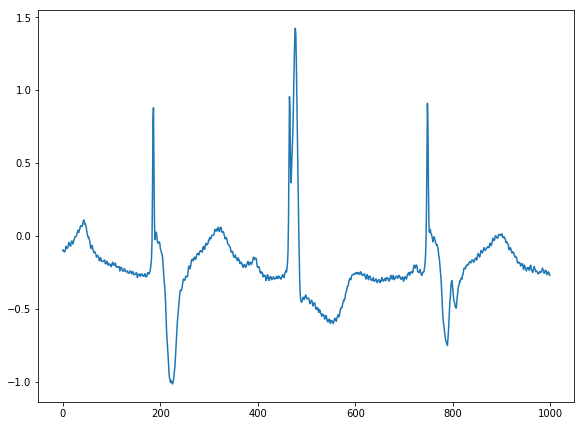

In [5]:
plt.plot(signals[1000:2000])

In [6]:
fields

{'fs': 360,
 'sig_len': 25000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['V5'],
 'comments': ['66 F 1567 694 x1',
  'Digoxin, Pronestyl',
  'The rate of paced rhythm is close to that of the underlying sinus rhythm,',
  'resulting in many pacemaker fusion beats.  The PVCs are multiform.  Several',
  'bursts of muscle noise occur, but the signals are generally of good quality.']}

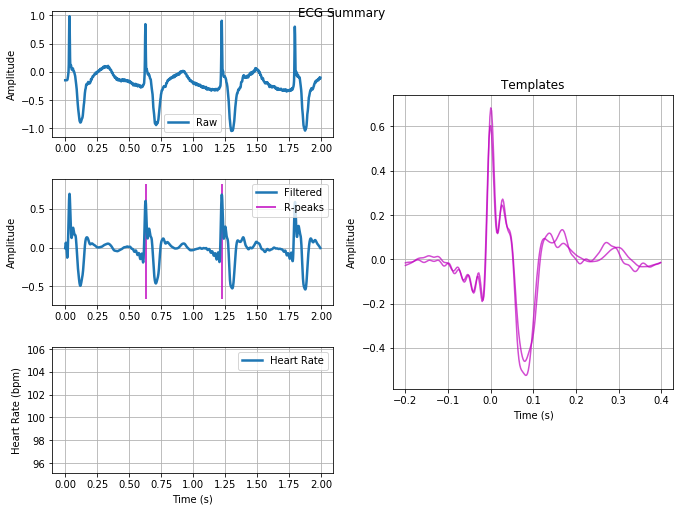

In [76]:
from biosppy import storage
from biosppy.signals import ecg
plt.rcParams['figure.figsize'] = (9.6, 7.2)
# load raw ECG signal
#signal, mdata = storage.load_txt('./examples/ecg.txt')

# process it and plot
out = ecg.ecg(signal=signals.flatten()[:1000], sampling_rate=500., show=True)

In [54]:
#out

In [3]:
import utils
data, labels = utils.getSubset(100)

array([ 0.05378887,  0.02689444,  0.        , ..., -0.02689444,
       -0.02689444, -0.02689444], dtype=float32)

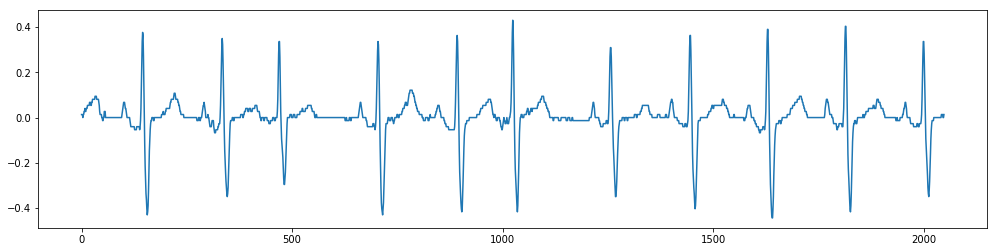

In [8]:
plt.figure(figsize=(17,4))
plt.plot(data.values[1]);

In [29]:
import biosppy
a = biosppy.signals.ecg.christov_segmenter(data.values[1], sampling_rate=1000.)

In [30]:
a

ReturnTuple(rpeaks=array([ 145,  334,  892, 1445, 1629, 1814]))

In [28]:
biosppy.signals.bvp.find_onsets(data.values[1], sampling_rate=1000.)

ReturnTuple(onsets=array([], dtype=int64))

In [27]:
biosppy.signals.ecg.engzee_segmenter(data.values[1], sampling_rate=1000.)

ReturnTuple(rpeaks=array([ 145,  469, 1024, 1445, 1814]))

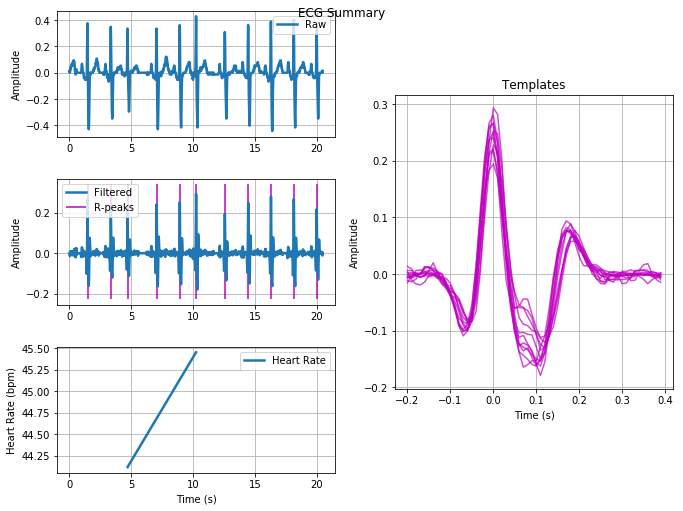

In [36]:
plt.rcParams['figure.figsize'] = (9.6, 7.2)
out = biosppy.signals.ecg.ecg(signal=data.values[1], sampling_rate=100., show=True)

In [21]:
out.keys()

['ts',
 'filtered',
 'rpeaks',
 'templates_ts',
 'templates',
 'heart_rate_ts',
 'heart_rate']

In [24]:
out["templates"].T

array([[-5.34084148e-03,  3.55174570e-03,  2.60515779e-03,
        -5.15547956e-04, -4.80957500e-03,  1.34521084e-02,
        -7.28050317e-03,  6.32257271e-03, -1.13315296e-02,
        -1.55468313e-02, -2.99394204e-03],
       [-6.76865181e-03, -1.12555581e-02,  2.16591127e-03,
         1.38729633e-04, -4.61668167e-03,  8.55769091e-03,
        -5.74439218e-03,  6.02581403e-03, -1.36386406e-02,
        -1.91685340e-03, -1.57784828e-03],
       [-3.31511016e-03, -1.76673405e-02,  1.46641407e-03,
         1.50397541e-03, -8.49799599e-04, -1.58715354e-03,
         6.21733104e-03, -3.39020314e-03, -8.90348221e-03,
        -1.04420593e-03, -2.71411272e-03],
       [-5.54715037e-03, -1.91740160e-02,  7.25114939e-04,
         7.71948083e-04, -3.83062477e-04, -5.60192563e-03,
         7.32691088e-03, -5.07653675e-03,  2.07296860e-03,
        -8.81363857e-04, -1.86693515e-05],
       [-3.09714975e-03, -1.41991872e-02,  1.34053861e-02,
         2.14264321e-03,  1.70135197e-03, -3.39406831e-03,
  

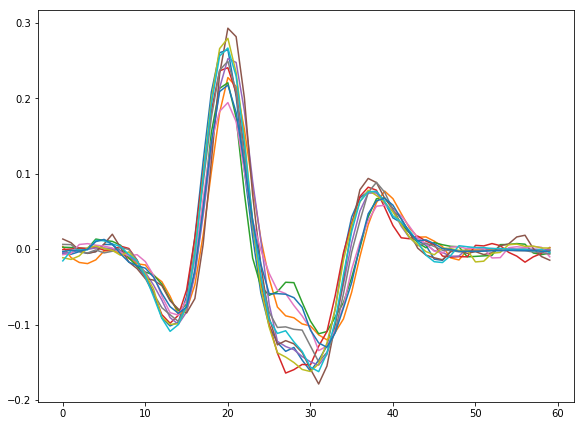

In [25]:
plt.plot(out["templates"].T);

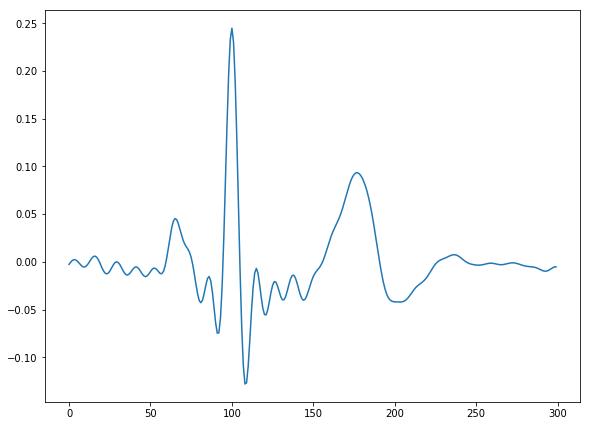

In [55]:
plt.plot(out["templates"].T.mean(1));

In [ ]:
def encode(x):
    out = ecg.ecg(signal=x, sampling_rate=500., show=False)
    return np.concatenate([out["templates"].T.mean(1), out["templates"].T.std(1)], axis=0)

In [113]:
encode(data.iloc[0,3:].values.astype("float32")).shape

(600,)

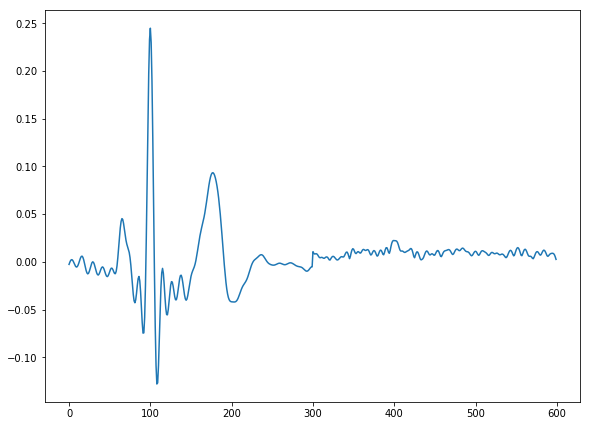

In [114]:
plt.plot(encode(data.iloc[0,3:].values.astype("float32")));

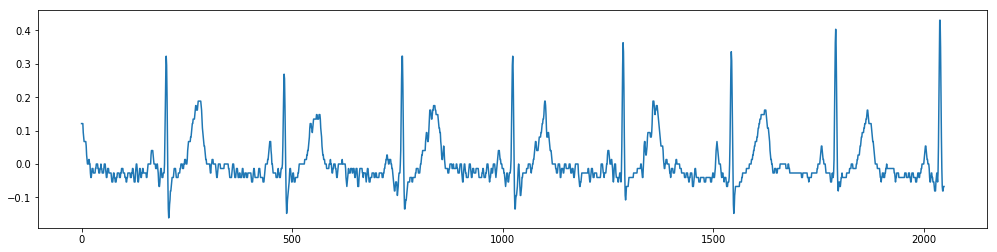

In [89]:
plt.figure(figsize=(17,4))
plt.plot(data.iloc[0,3:].values.astype("float32"))

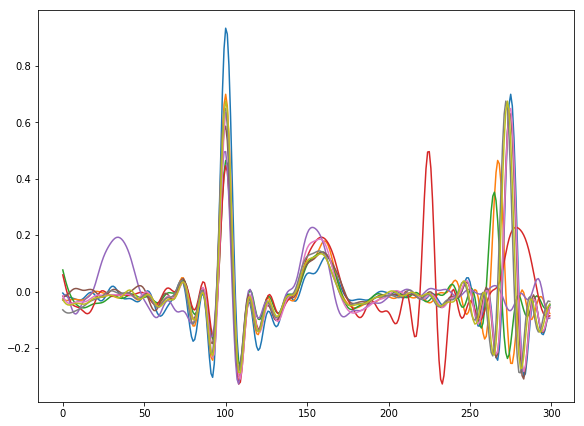

In [95]:
plt.plot(encode(data.iloc[1,3:].values.astype("float32")));

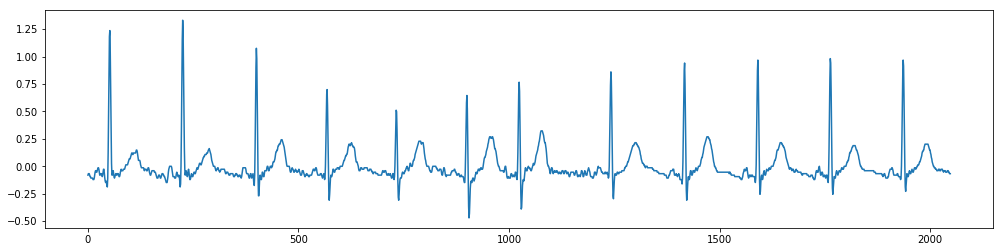

In [94]:
plt.figure(figsize=(17,4))
plt.plot(data.iloc[1,3:].values.astype("float32"))

In [38]:
import importlib

In [39]:
import encoders
importlib.reload(encoders);

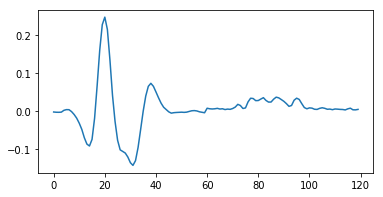

In [47]:
plt.figure(figsize=(6,3))
enc = encoders.biosppy_mean_beat()
plt.plot(enc.encode(data.values[1]));

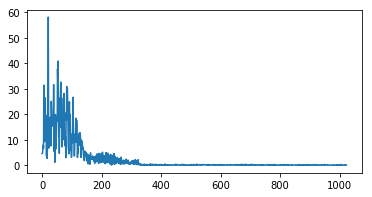

In [50]:
plt.figure(figsize=(6,3))
enc = encoders.fft()
plt.plot(enc.encode(data.values[0]));

array([ 0.05378887,  0.02689444,  0.        , ..., -0.02689444,
       -0.02689444, -0.02689444], dtype=float32)

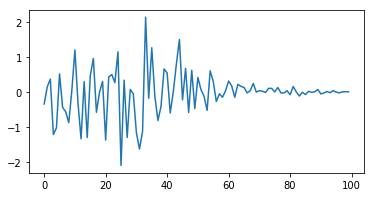

In [52]:
plt.figure(figsize=(6,3))
enc = encoders.pca(data.values)
plt.plot(enc.encode(data.values[0]));

Effective receptive field: 2049 1024


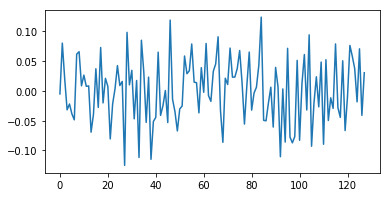

In [56]:
plt.figure(figsize=(6,3))
enc = encoders.convautoencoder()
plt.plot(enc.encode(data.values[0]));